In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow.keras import backend as k
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout


In [2]:

labeled = pd.read_csv('./data/labeled_data.csv', low_memory=False, index_col=False)
unlabeled = pd.read_csv('./data/unlabeled_data.csv', low_memory=False, index_col=False)

In [3]:
labeled.columns

Index(['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL',
       'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'PassOrFail', 'Reason',
       'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time',
       'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Barrel_Temperature_7', 'Hopper_Temperature',
       'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_3',
       'Mold_Temperature_4', 'Mold_Temperature_5', 'Mold_Temperature_6',
       'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9',
       'Mold_Temperature_10', 'Mold_Temperature_11', 

In [4]:
labeled["PART_NAME"].unique()

array(["CN7 W/S SIDE MLD'G RH", "CN7 W/S SIDE MLD'G LH",
       "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH",
       'SP2 CVR ROOF RACK CTR, RH', "JX1 W/S SIDE MLD'G RH"], dtype=object)

In [5]:
labeled_cn7 = labeled[(labeled["PART_NAME"] == "CN7 W/S SIDE MLD'G RH") | (labeled["PART_NAME"] == "CN7 W/S SIDE MLD'G LH")]
len(labeled_cn7)

6736

In [6]:
labeled_cn7["EQUIP_NAME"].value_counts()

EQUIP_NAME
650톤-우진2호기    6736
Name: count, dtype: int64

In [7]:
unlabeled_cn7 = unlabeled[(unlabeled["PART_NAME"] == "CN7 W/S SIDE MLD'G RH") | (unlabeled["PART_NAME"] == "CN7 W/S SIDE MLD'G LH")]
len(unlabeled_cn7)

52547

In [65]:
unlabeled_cn7 = unlabeled[(unlabeled["PART_NAME"] == "RG3 MOLD'G W/SHLD, LH") | (unlabeled["PART_NAME"] == "RG3 MOLD'G W/SHLD, RH")]
unlabeled_cn7["EQUIP_NAME"].value_counts()

EQUIP_NAME
650톤-우진2호기    35941
550TON-도시바     1536
Name: count, dtype: int64

In [8]:
unlabeled_cn7["EQUIP_NAME"].value_counts()
unlabeled_cn7 = unlabeled_cn7[unlabeled_cn7["EQUIP_NAME"] == "650톤-우진2호기"]

In [9]:
unlabeled_cn7 = unlabeled_cn7.drop(columns=['Unnamed: 0', '_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', "PART_NO","ERR_FACT_QTY",
                             'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 
                             'Mold_Temperature_1', 'Mold_Temperature_2','Barrel_Temperature_7','Switch_Over_Position',
                             'Mold_Temperature_5', 'Mold_Temperature_6','Mold_Temperature_7', 'Mold_Temperature_8',
                             'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11',
                             'Mold_Temperature_12'])

In [10]:
labeled_cn7 = labeled_cn7.drop(columns=['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE',
                             'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'Reason',
                             'Mold_Temperature_1', 'Mold_Temperature_2','Barrel_Temperature_7','Switch_Over_Position',
                             'Mold_Temperature_5', 'Mold_Temperature_6','Mold_Temperature_7', 'Mold_Temperature_8',
                             'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11',
                             'Mold_Temperature_12'])

In [11]:
print(len(unlabeled_cn7.columns), len(labeled_cn7.columns))

24 25


In [12]:
labeled_cn7.columns

Index(['PassOrFail', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time',
       'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Hopper_Temperature', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

In [13]:
labeled_cn7 = labeled_cn7.drop(columns=['PassOrFail'])

In [14]:
labeled_cn7 = labeled_cn7.replace('Y', 1).replace('N',0)

<Axes: >

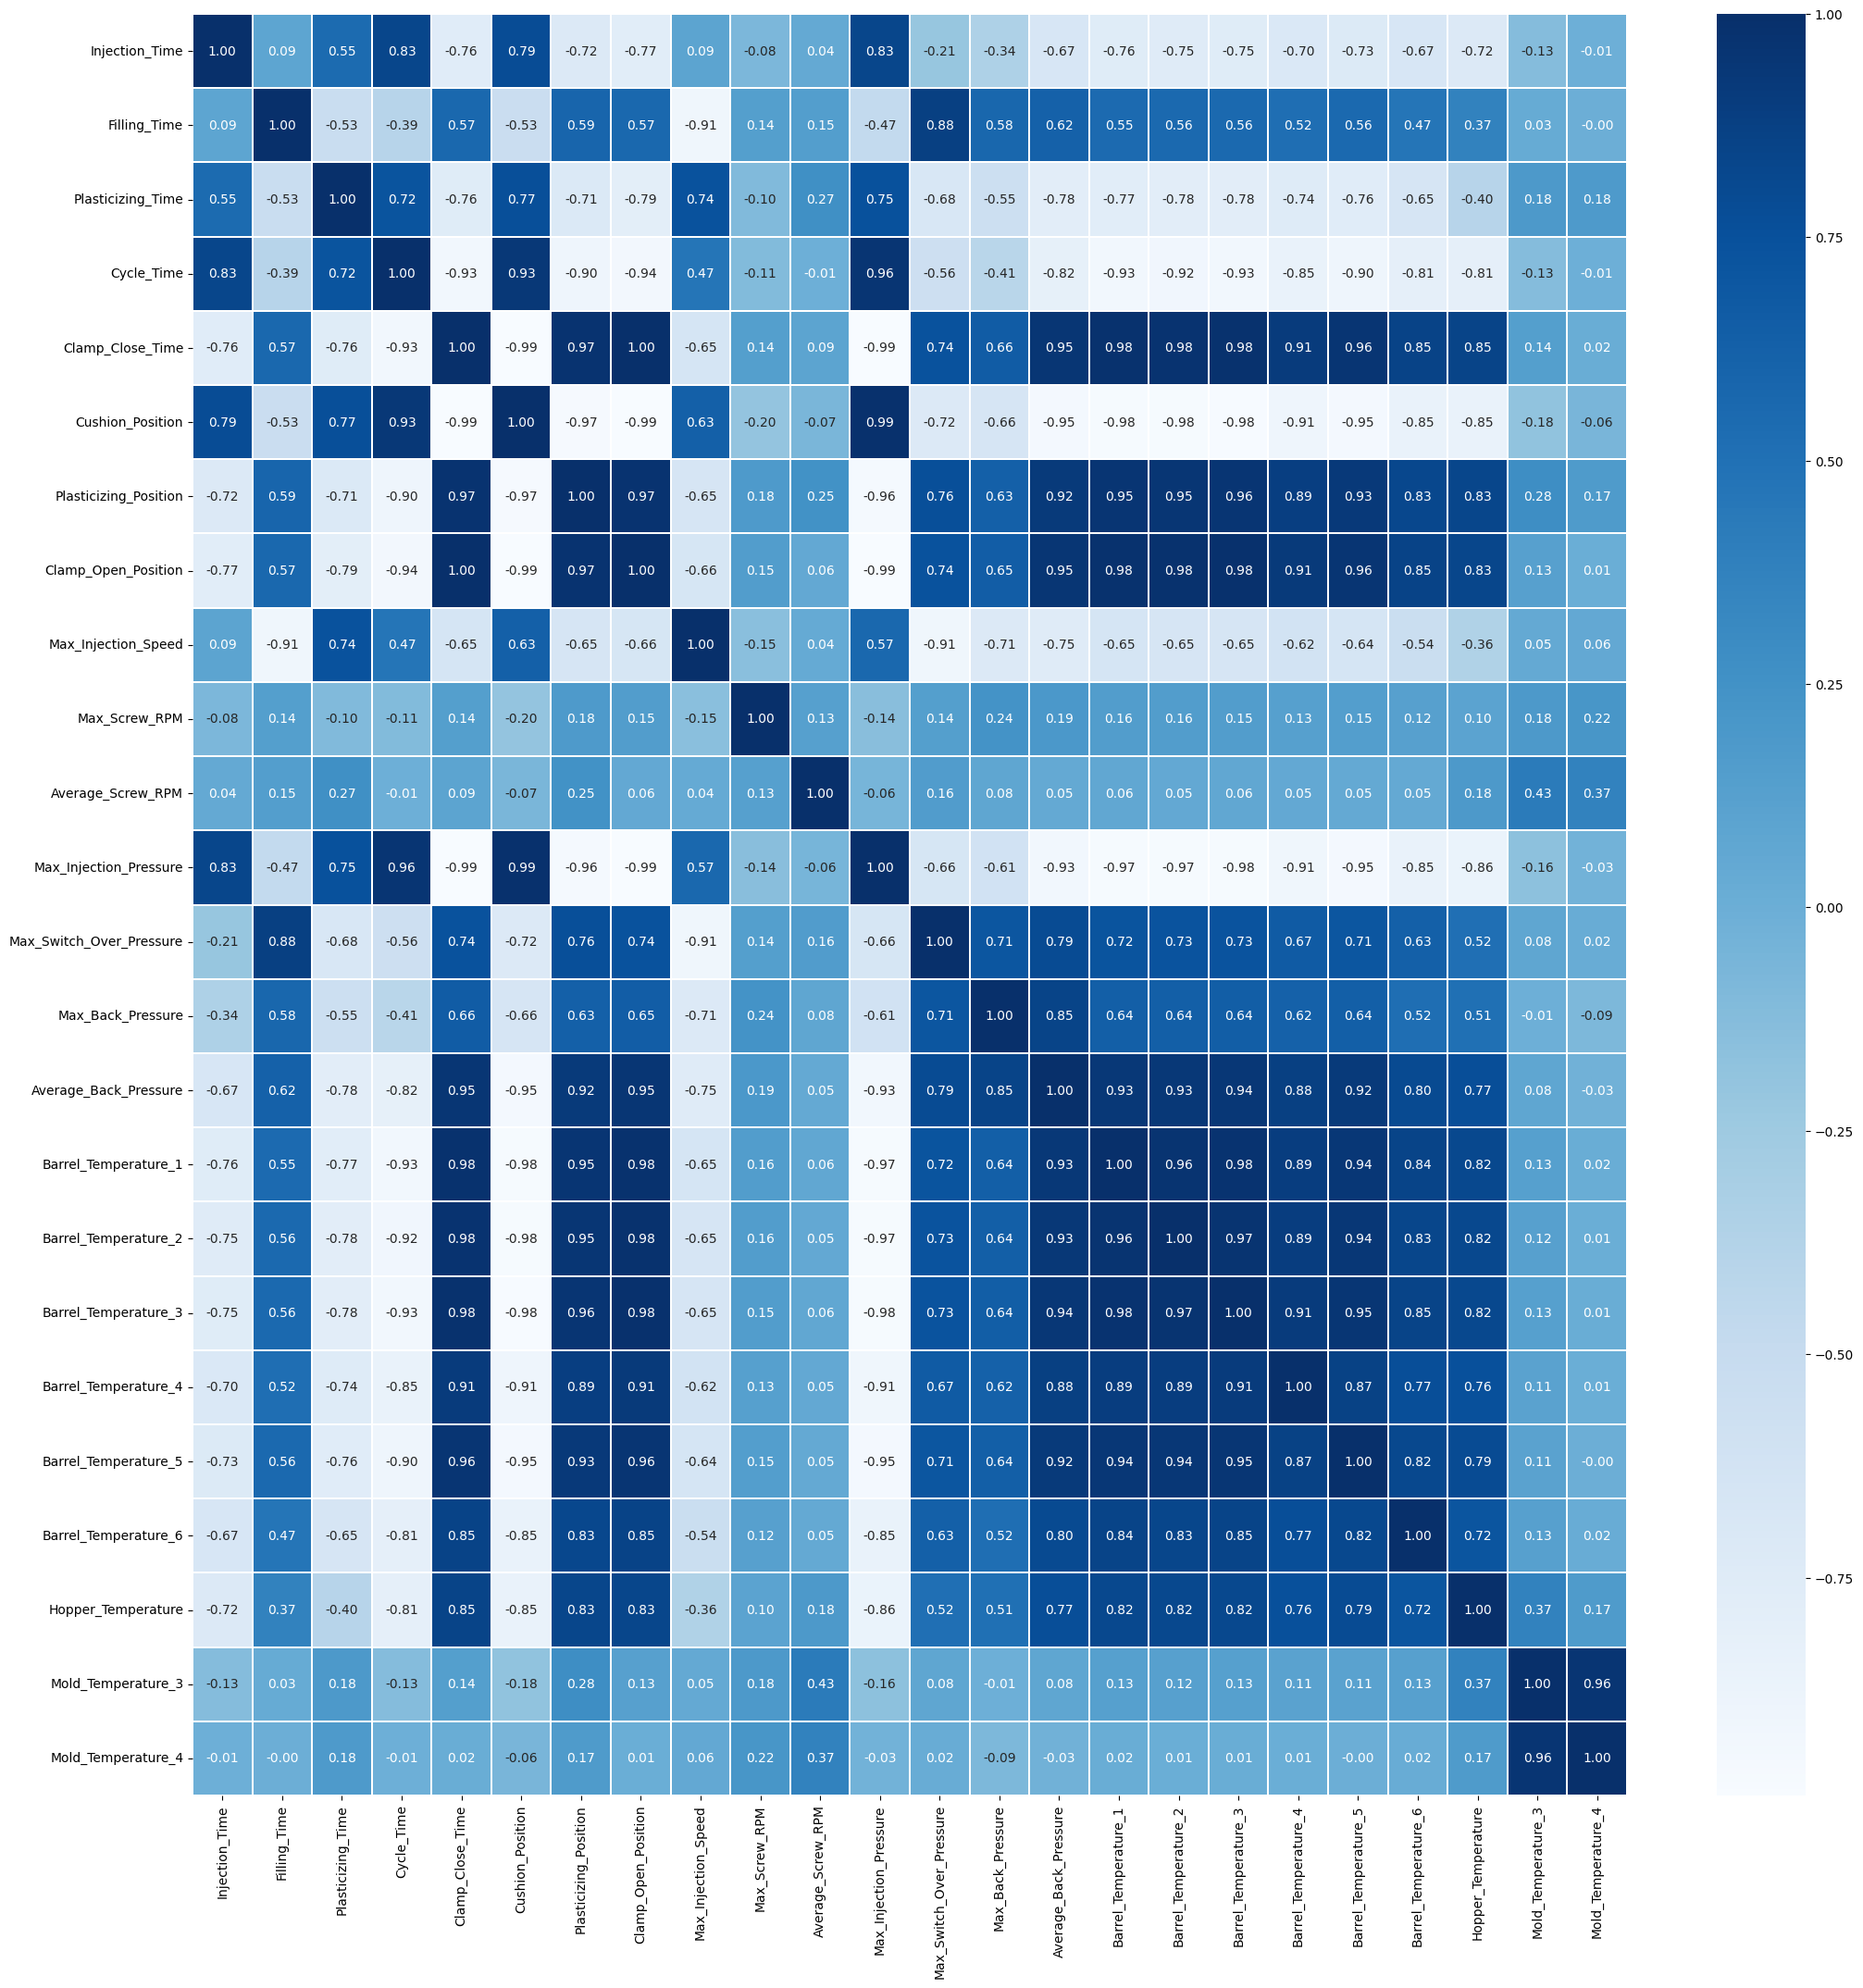

In [15]:
plt.subplots(figsize=(25,25))
sns.heatmap(data = labeled_cn7.corr(), linewidths=0.1, annot=True, fmt='.2f', cmap='Blues')

In [26]:
len(labeled_cn7_u)

2466

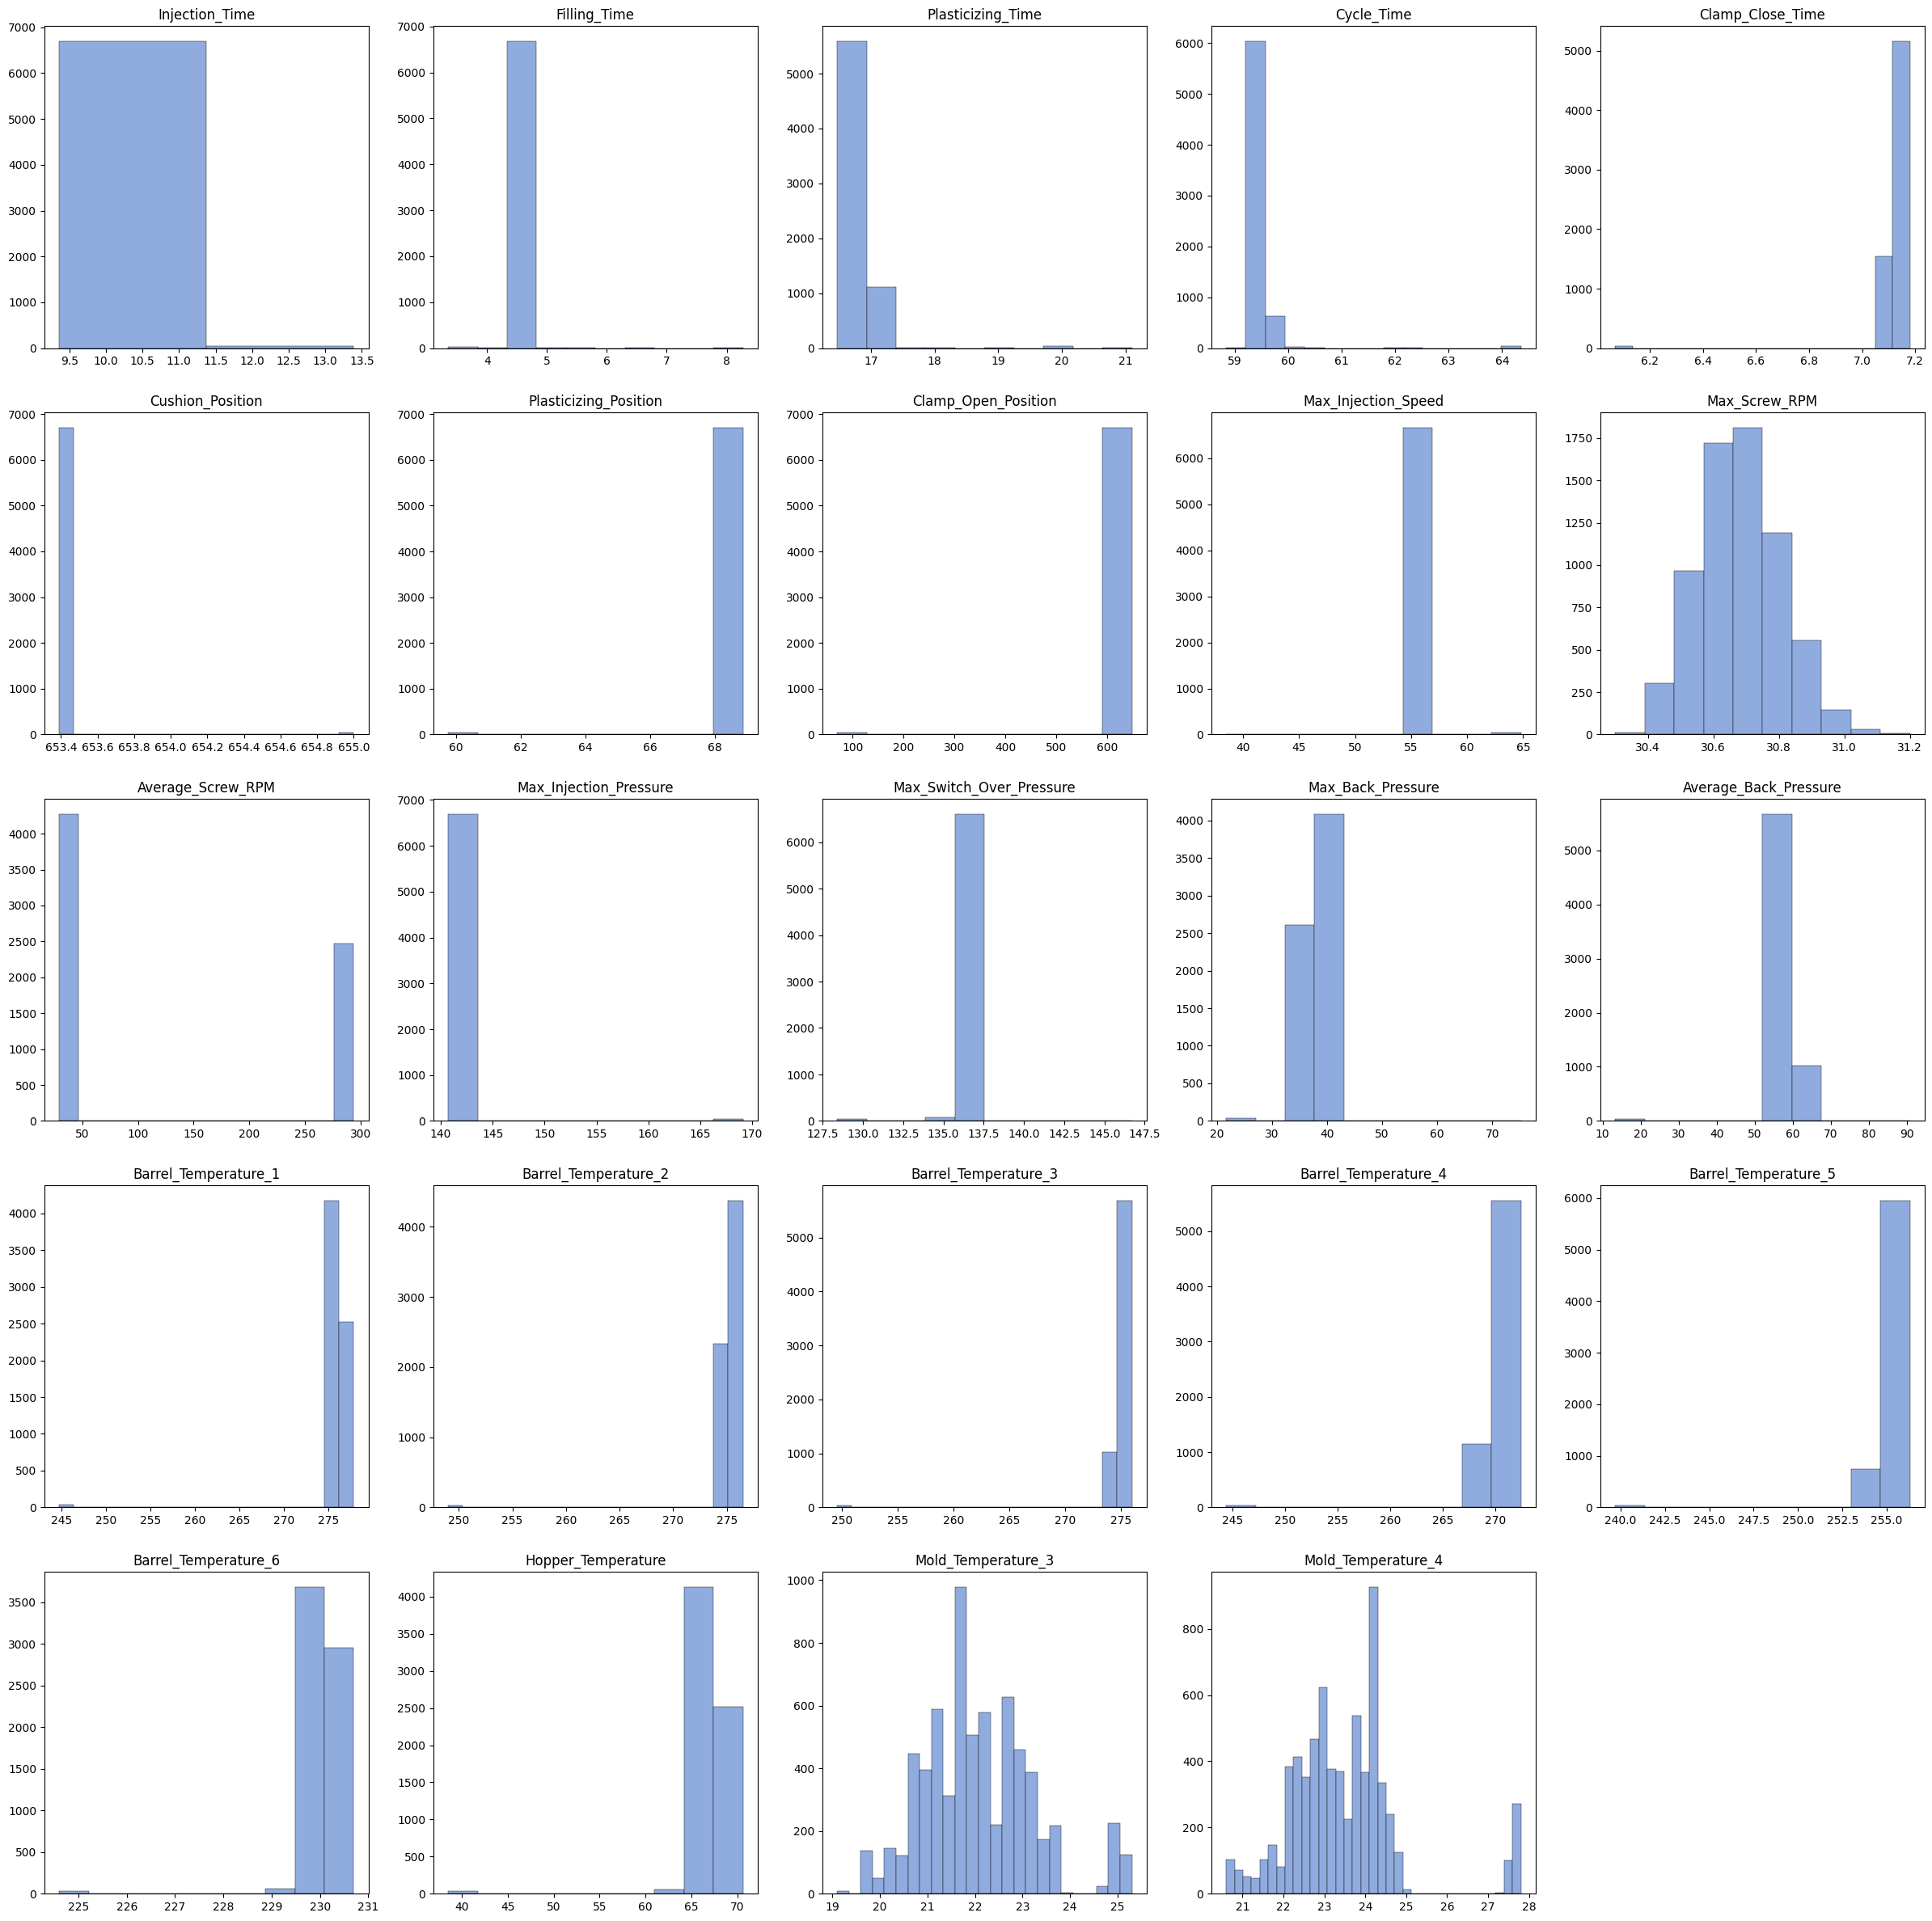

In [16]:
plt.figure(figsize=(30, 30))
bin = [2, 10, 10, 15, 17, 20, 10, 10, 10, 10, 15, 10, 10, 10, 10, 20, 20, 20, 10, 10, 10, 10, 25, 35, 35]
for index, value in enumerate(labeled_cn7):
    sub = plt.subplot(5, 5, index + 1)
    sub.hist(labeled_cn7[value], bins=bin[index], facecolor=(144/255,171/255,221/255), linewidth=0.3, edgecolor='black')
    plt.title(value)


<Axes: >

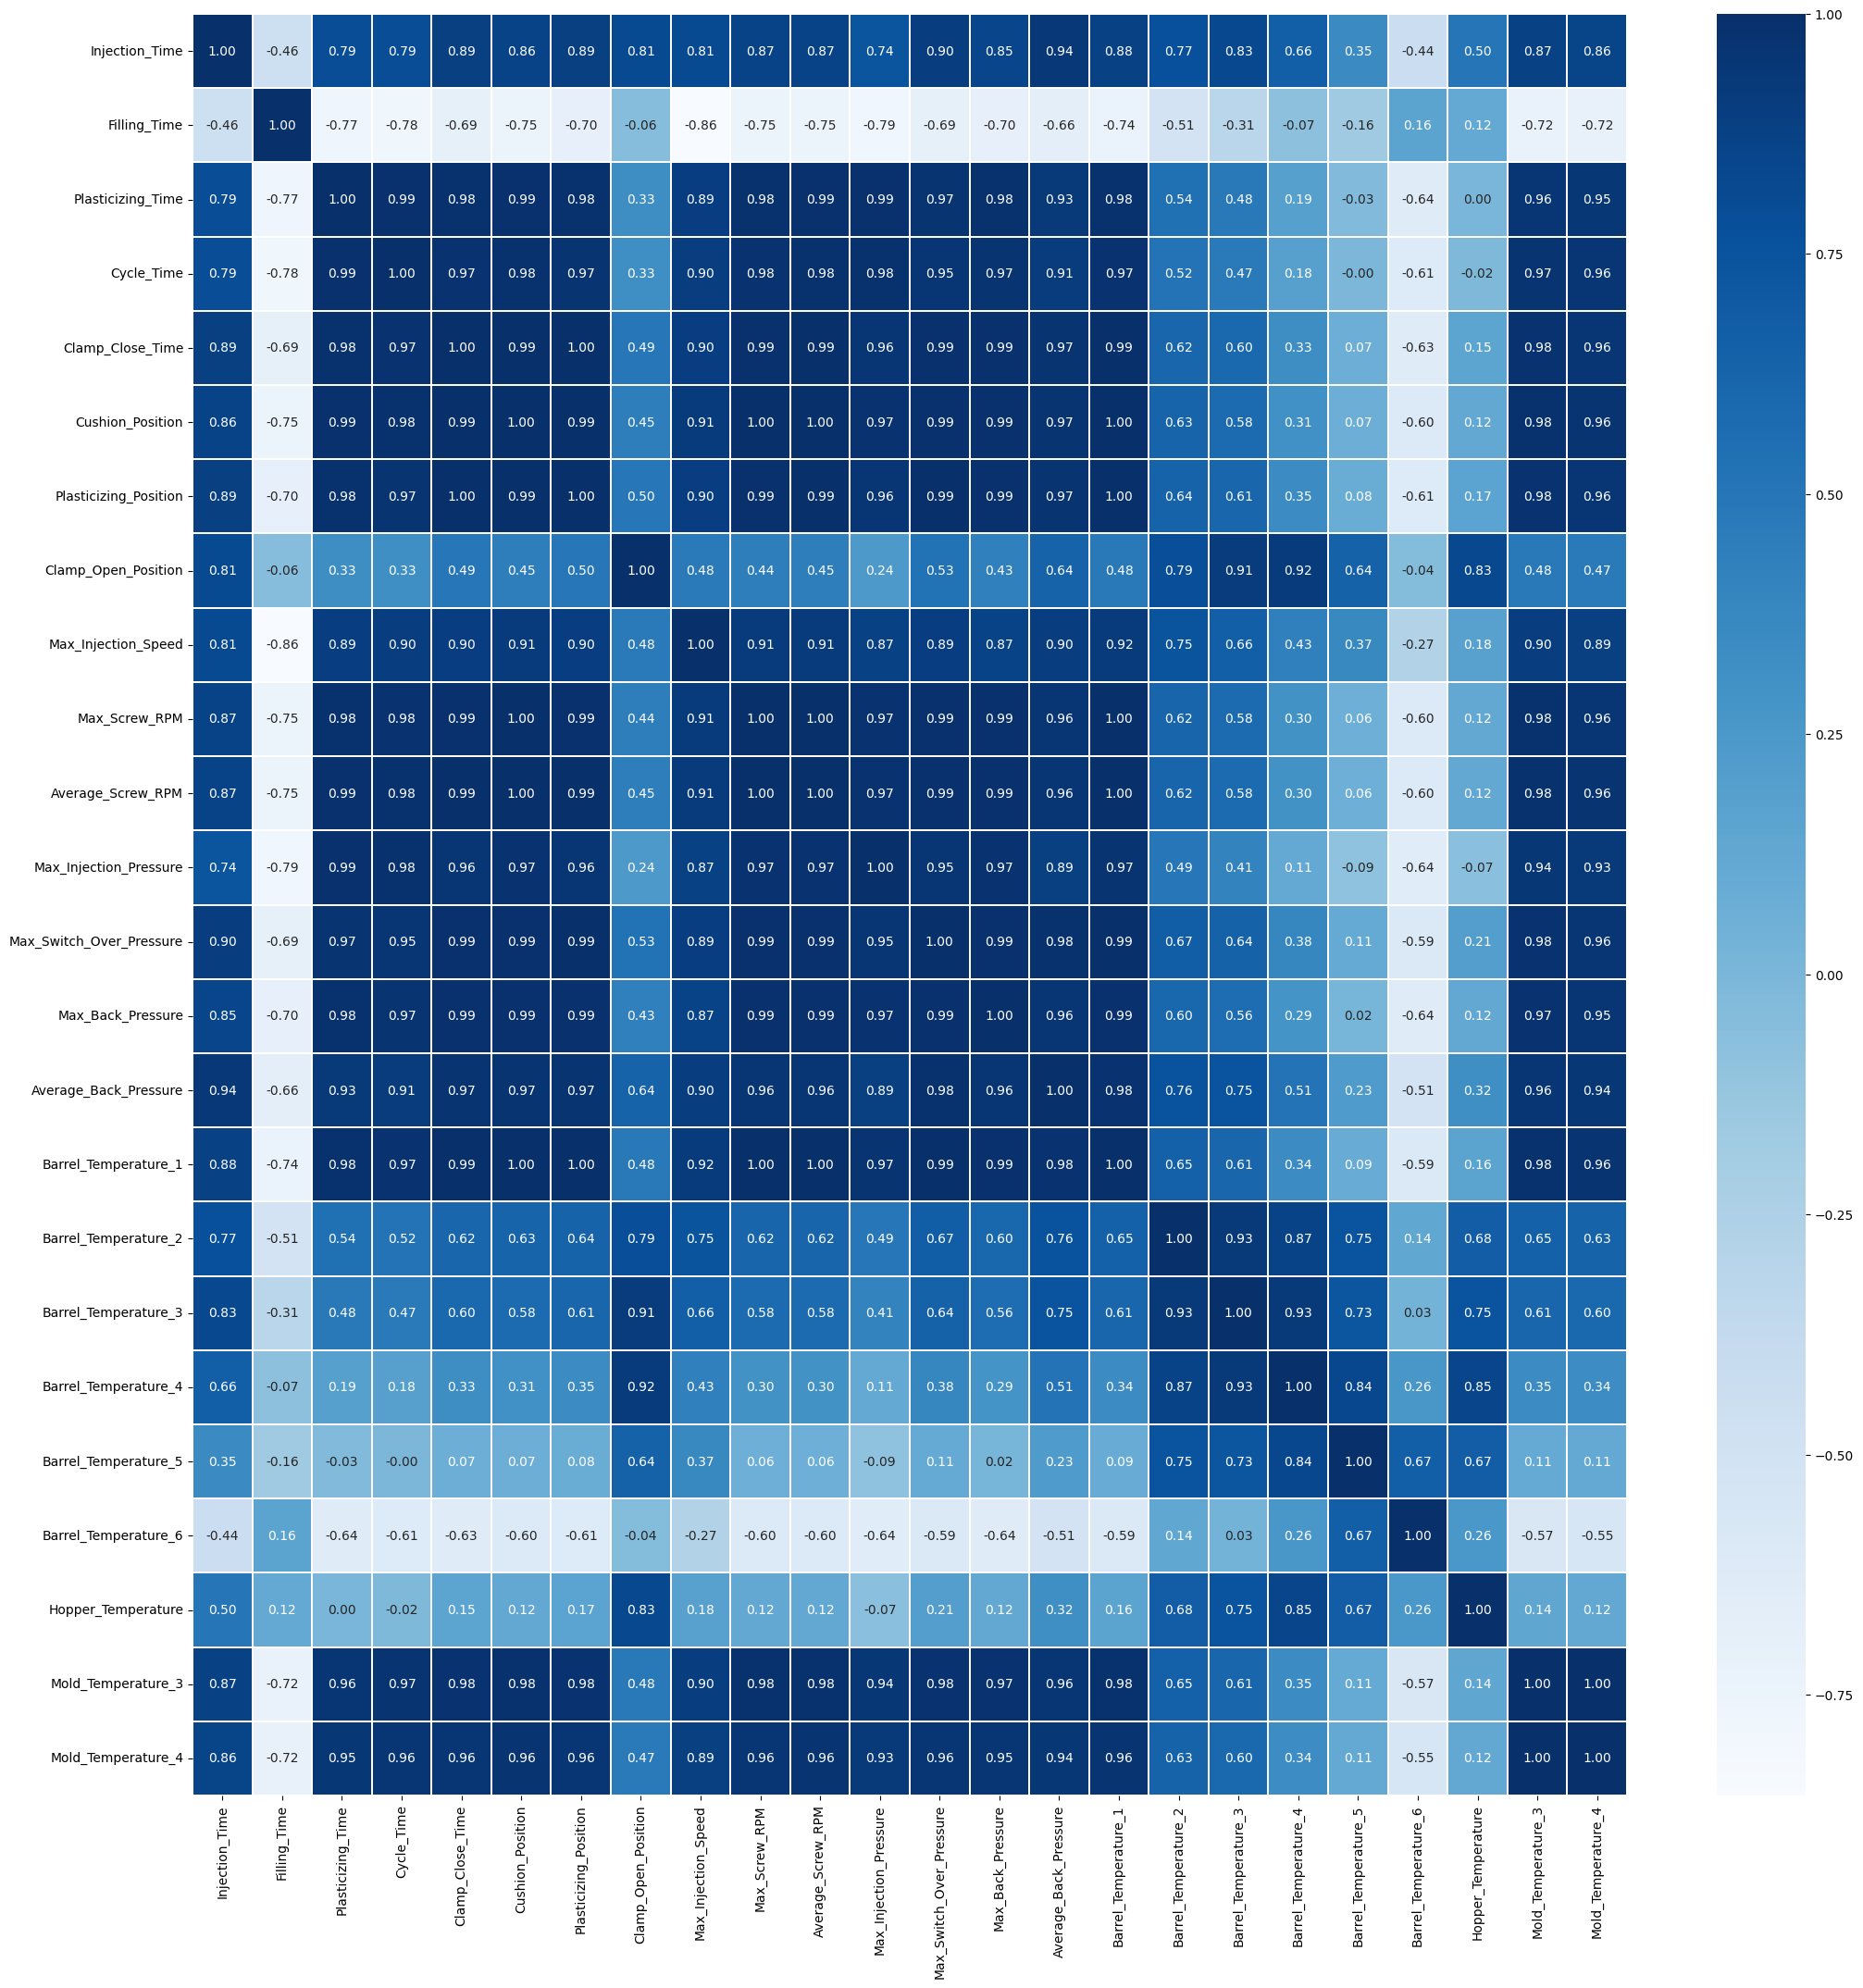

In [17]:
plt.subplots(figsize=(25,2-5))
sns.heatmap(data = unlabeled_cn7.corr(), linewidths=0.1, annot=True, fmt='.2f', cmap='Blues')

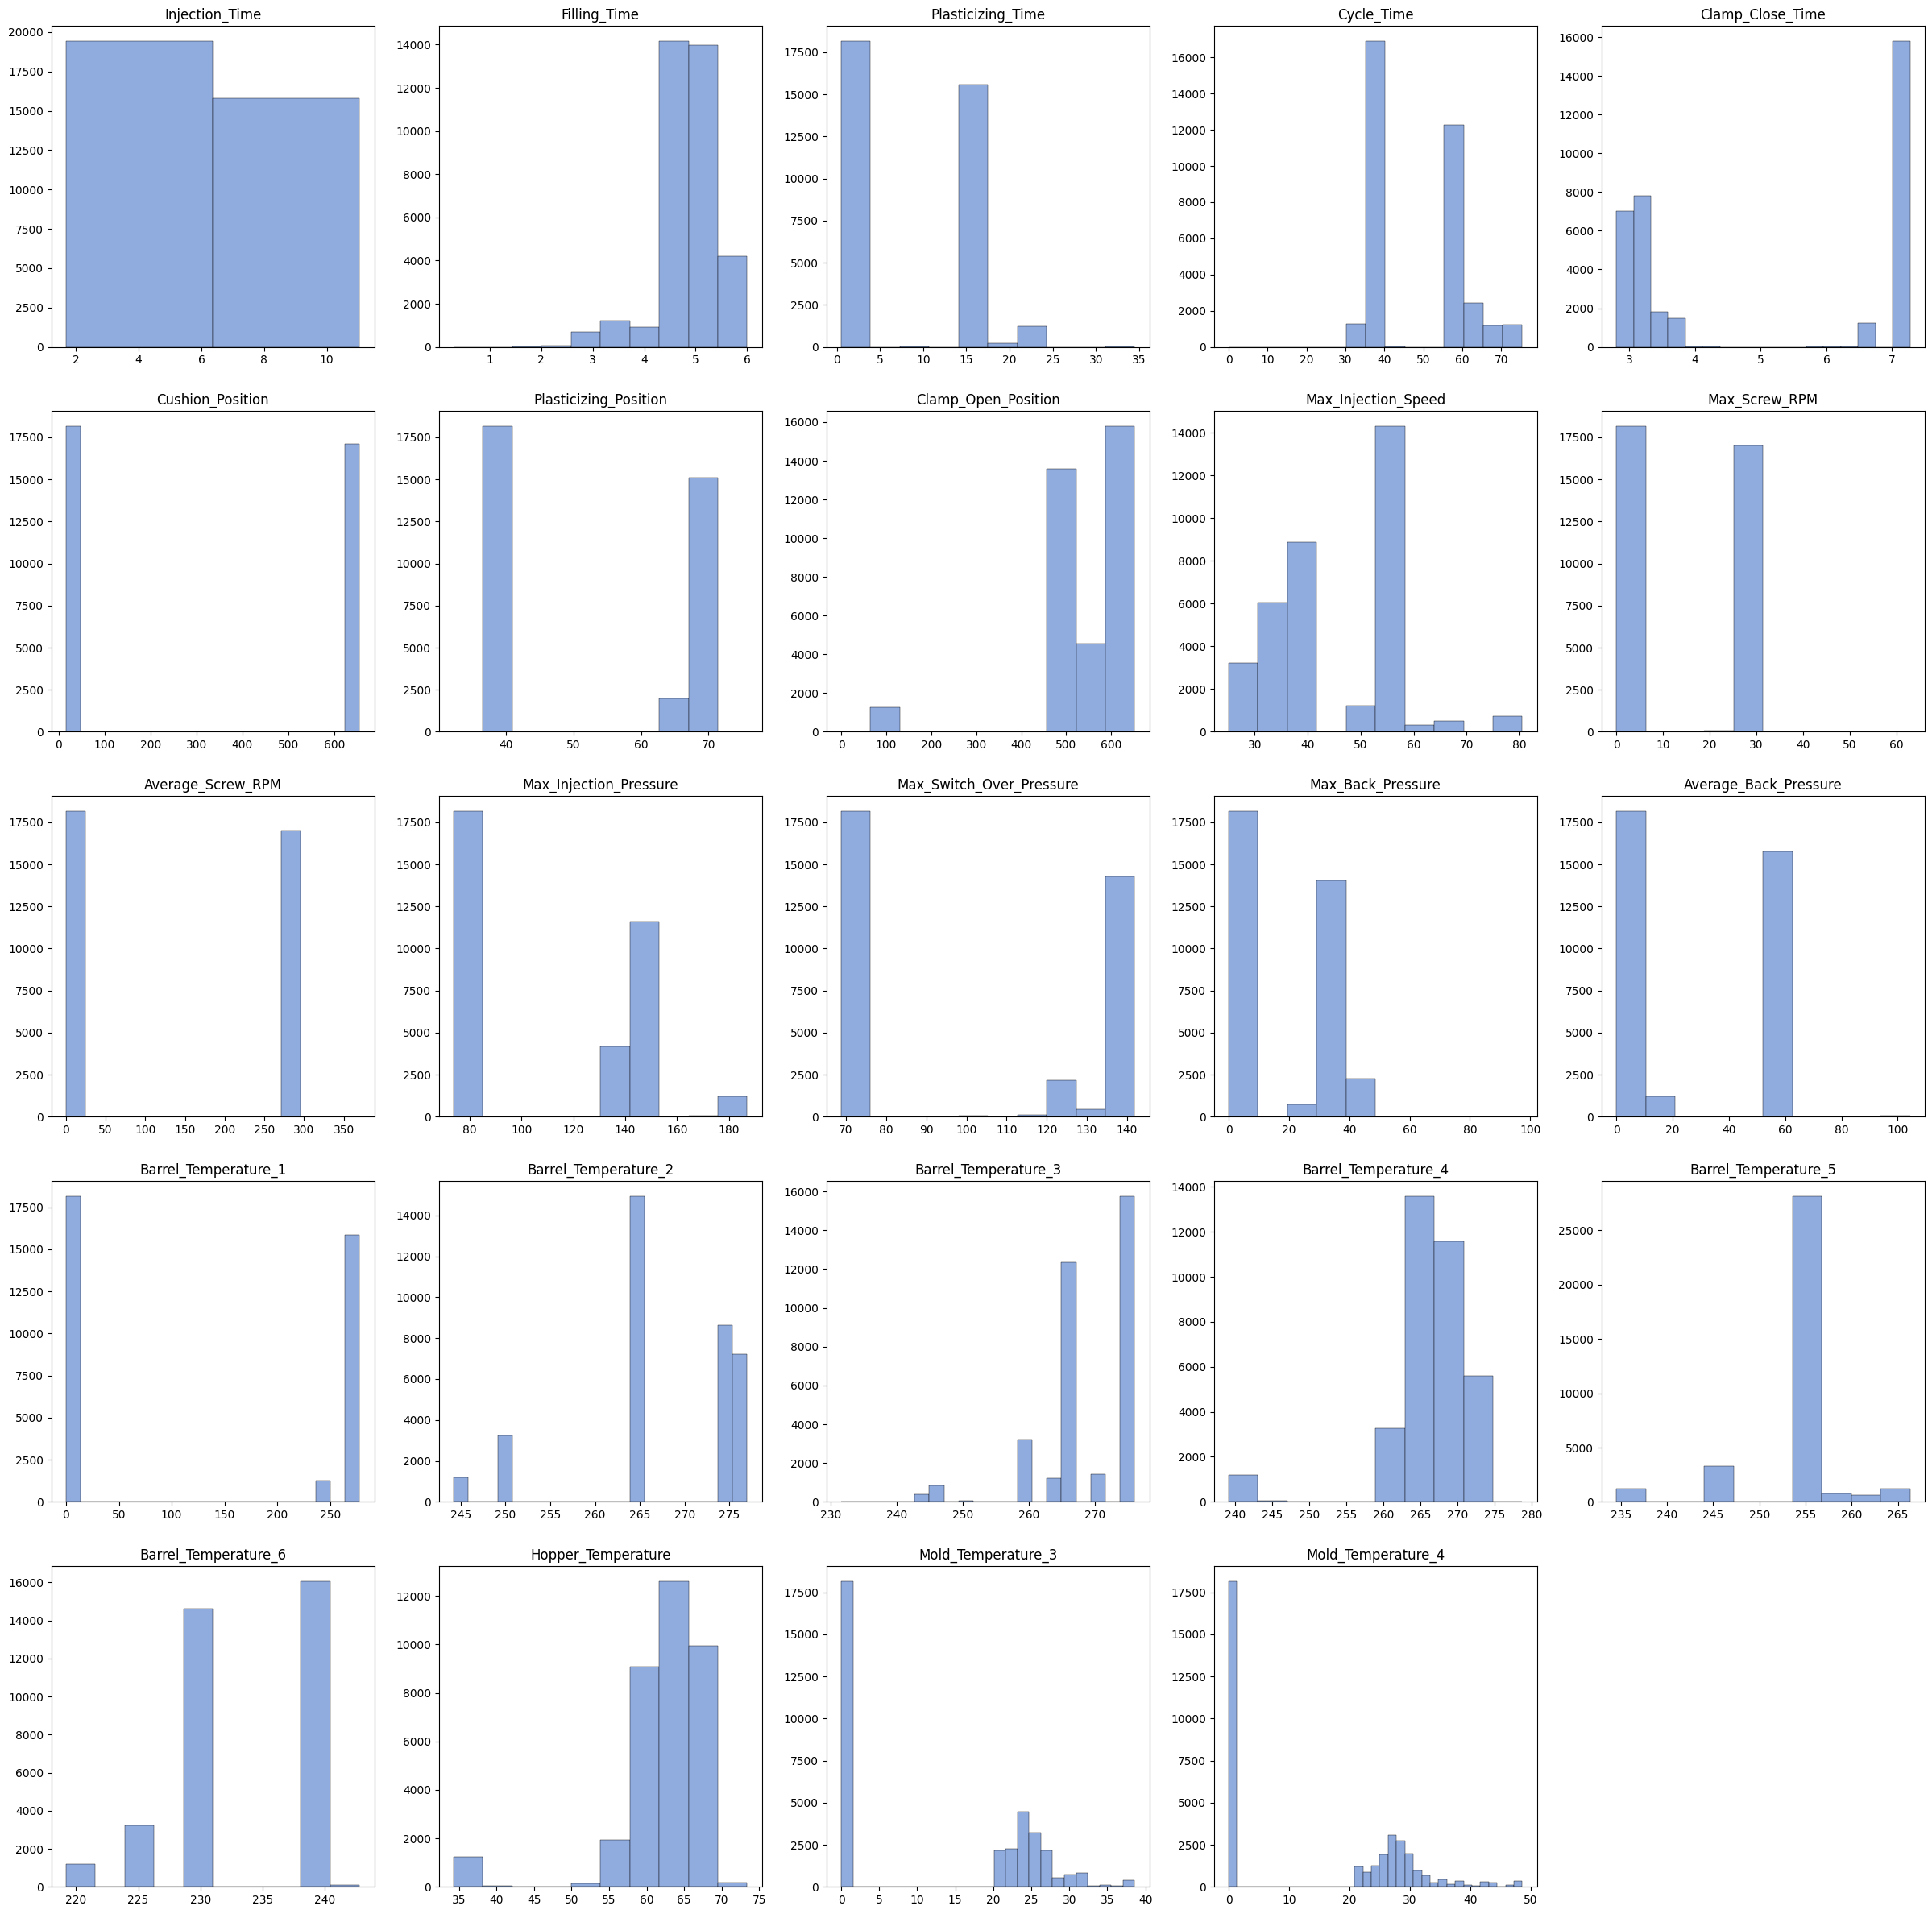

In [18]:
plt.figure(figsize=(30, 30))
bin = [2, 10, 10, 15, 17, 20, 10, 10, 10, 10, 15, 10, 10, 10, 10, 20, 20, 20, 10, 10, 10, 10, 25, 35, 35]
for index, value in enumerate(unlabeled_cn7):
    sub = plt.subplot(5, 5, index + 1)
    sub.hist(unlabeled_cn7[value], bins=bin[index], facecolor=(144/255,171/255,221/255), linewidth=0.3, edgecolor='black')
    plt.title(value)


In [19]:
labeled_cn7_u = labeled_cn7[labeled_cn7["Average_Screw_RPM"] > 100]
labeled_cn7_d = labeled_cn7[labeled_cn7["Average_Screw_RPM"] < 100]
unlabeled_cn7_u = unlabeled_cn7[unlabeled_cn7["Average_Screw_RPM"] > 100]
unlabeled_cn7_d = unlabeled_cn7[unlabeled_cn7["Average_Screw_RPM"] < 100]

In [27]:
unlabeled_cn7_u.columns

Index(['Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time',
       'Clamp_Close_Time', 'Cushion_Position', 'Plasticizing_Position',
       'Clamp_Open_Position', 'Max_Injection_Speed', 'Max_Screw_RPM',
       'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Hopper_Temperature', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

In [ ]:
"Injection_Time", "Filling_Time", "Plasticizing_Time", 

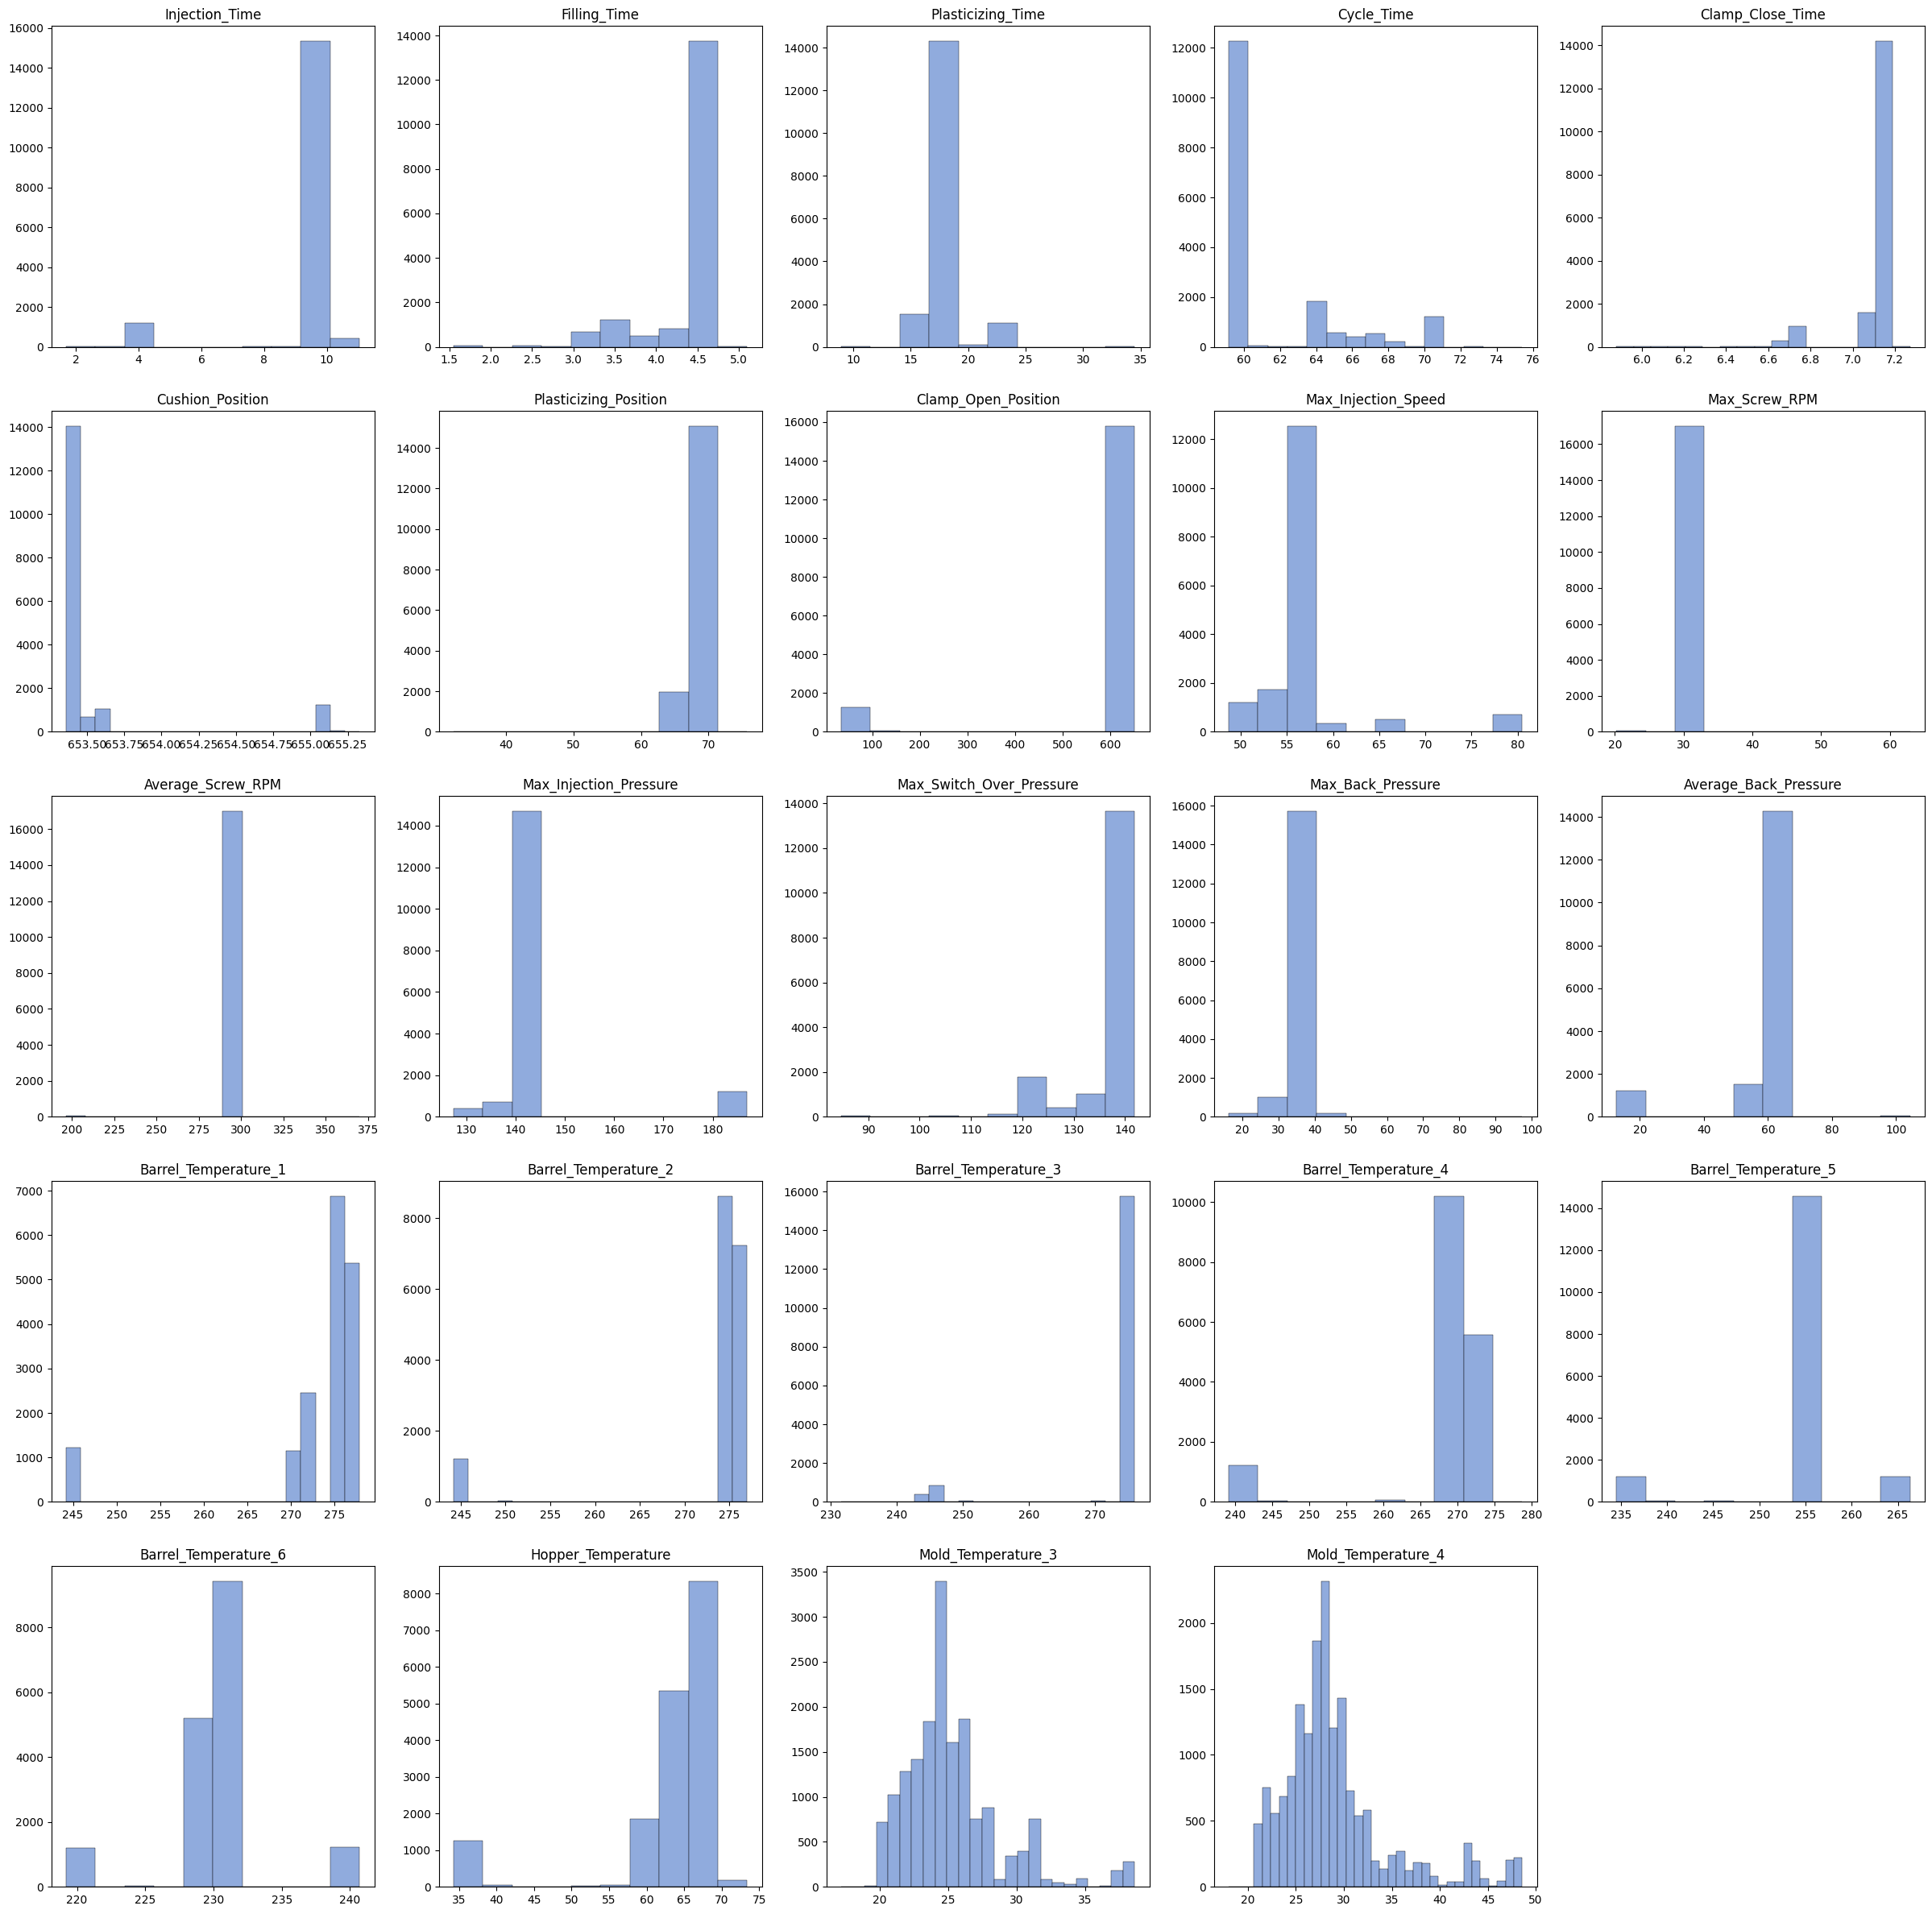

In [20]:
plt.figure(figsize=(30, 30))
bin = [10, 10, 10, 15, 17, 20, 10, 10, 10, 10, 15, 10, 10, 10, 10, 20, 20, 20, 10, 10, 10, 10, 25, 35, 35]
for index, value in enumerate(unlabeled_cn7_u):
    sub = plt.subplot(5, 5, index + 1)
    sub.hist(unlabeled_cn7_u[value], bins=bin[index], facecolor=(144/255,171/255,221/255), linewidth=0.3, edgecolor='black')
    plt.title(value)


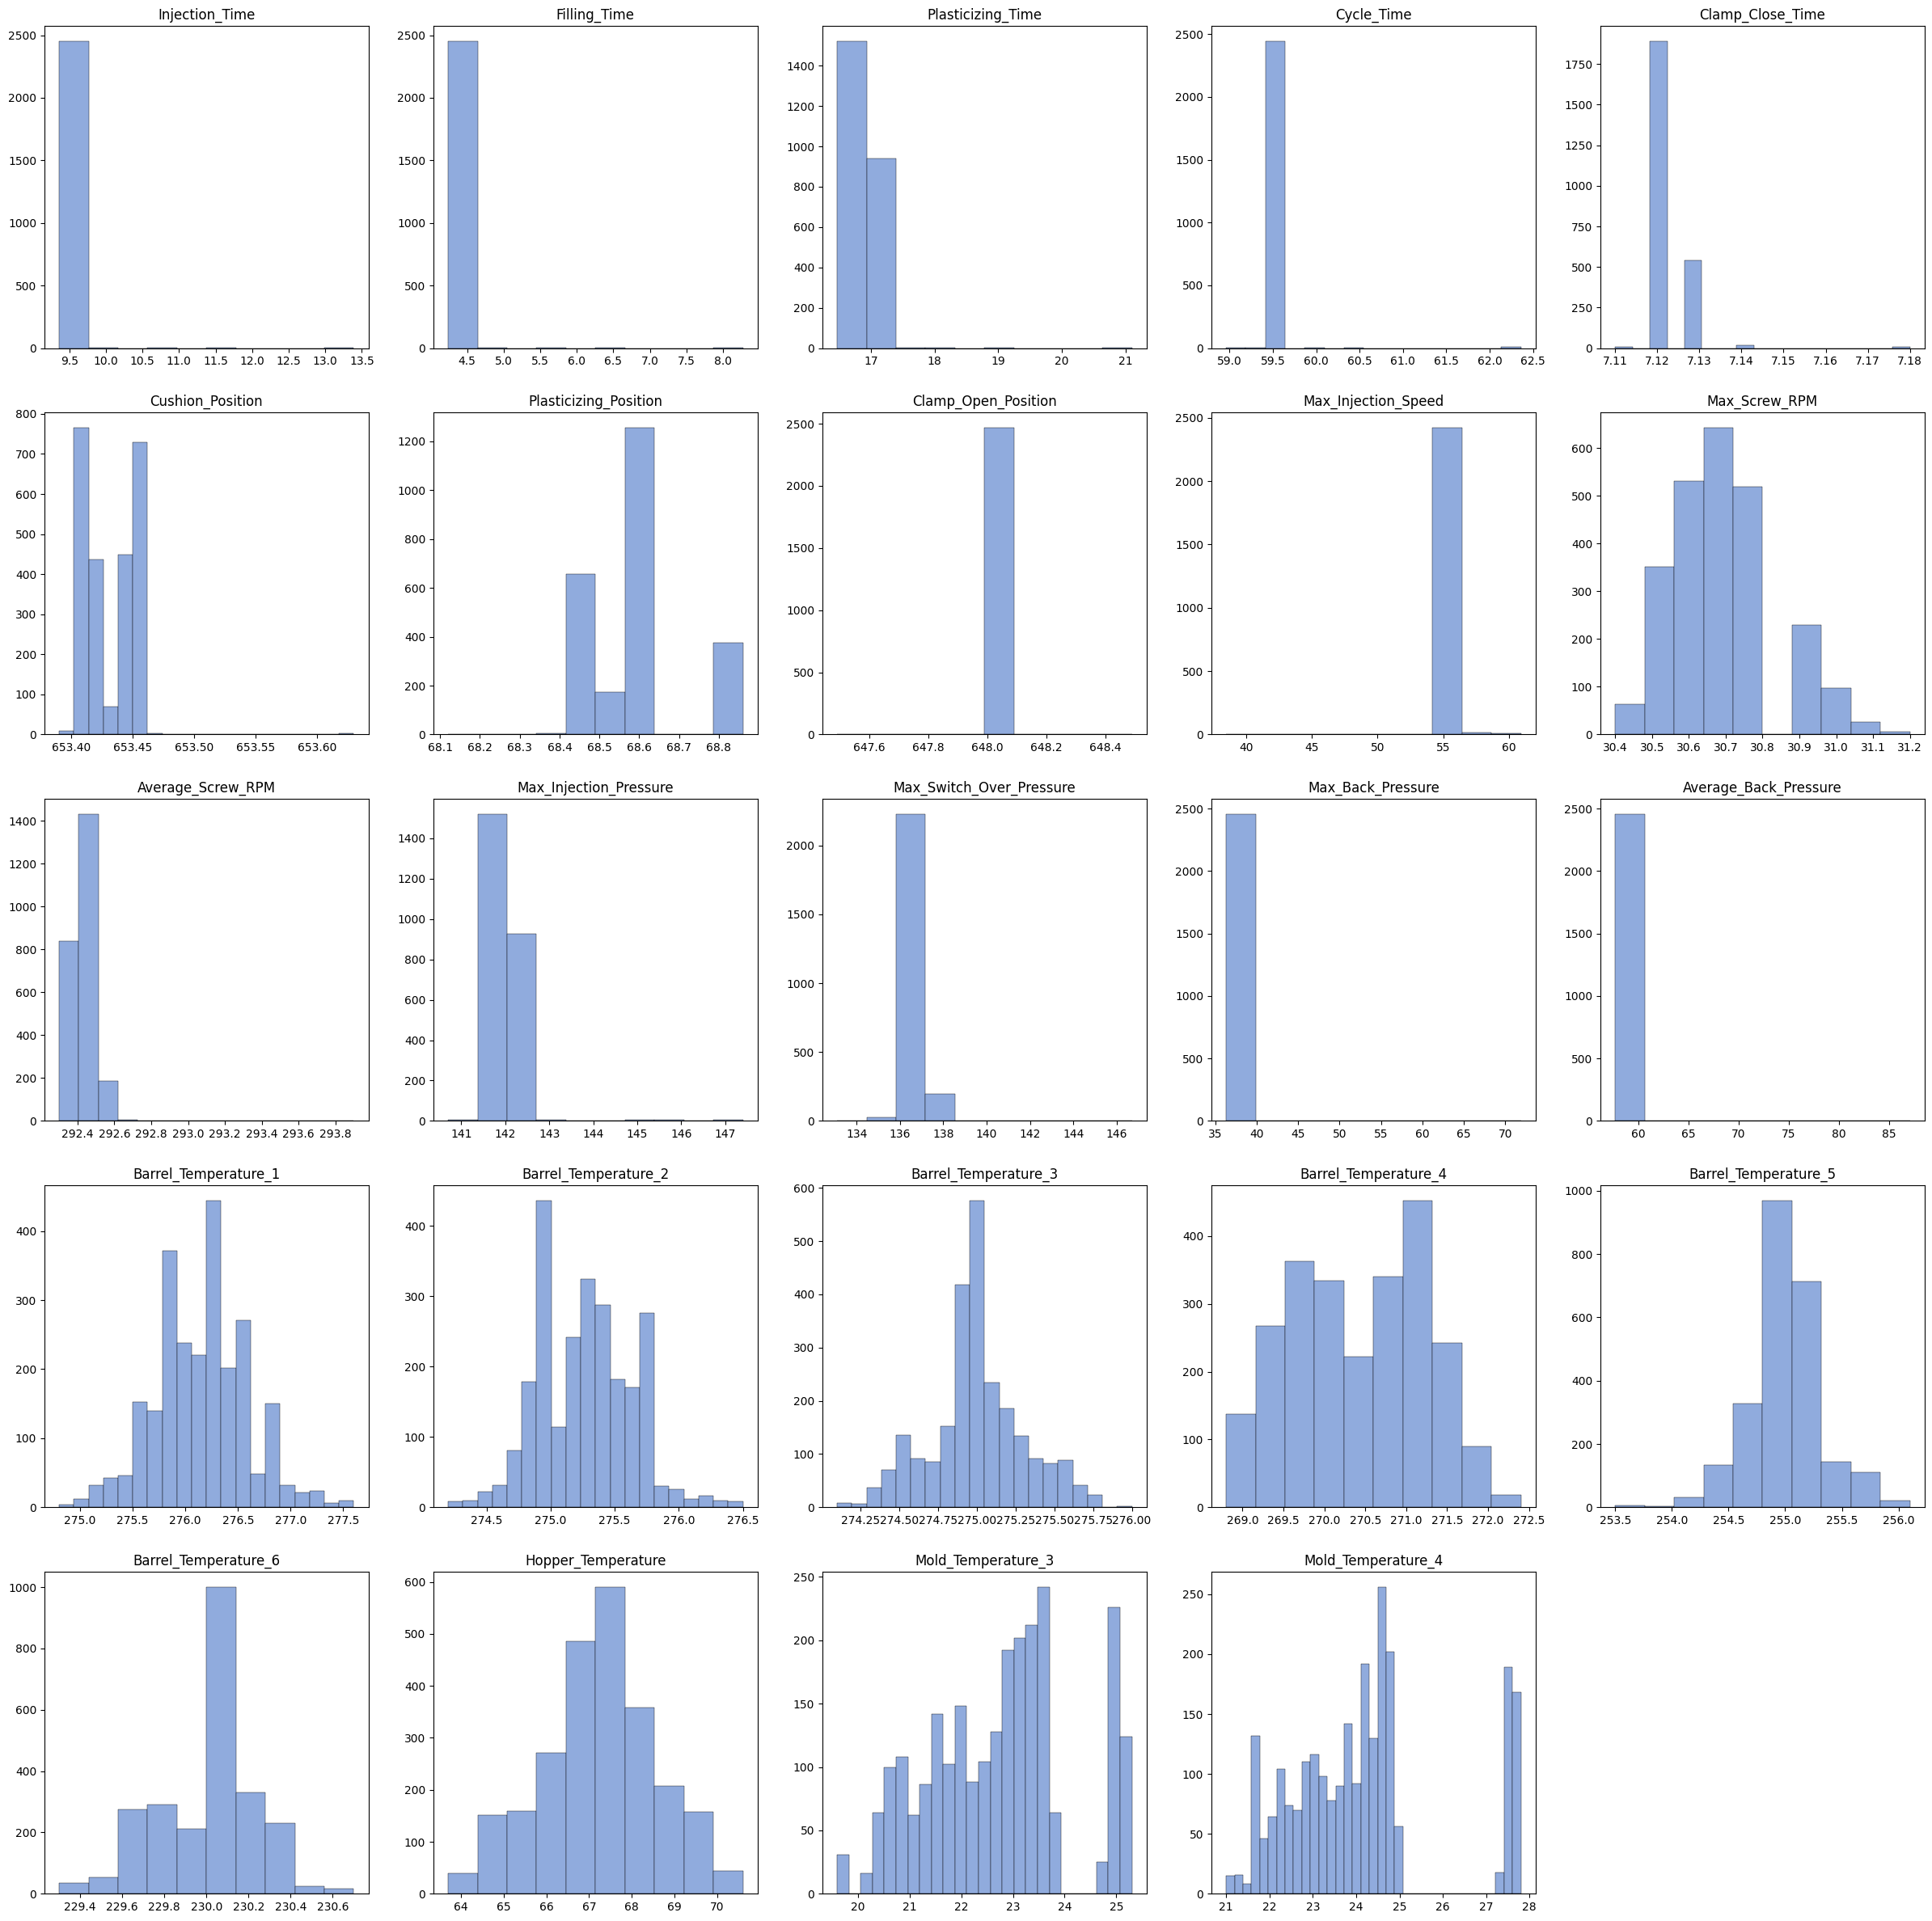

In [21]:
plt.figure(figsize=(30, 30))
bin = [10, 10, 10, 15, 17, 20, 10, 10, 10, 10, 15, 10, 10, 10, 10, 20, 20, 20, 10, 10, 10, 10, 25, 35, 35]
for index, value in enumerate(labeled_cn7_u):
    sub = plt.subplot(5, 5, index + 1)
    sub.hist(labeled_cn7_u[value], bins=bin[index], facecolor=(144/255,171/255,221/255), linewidth=0.3, edgecolor='black')
    plt.title(value)


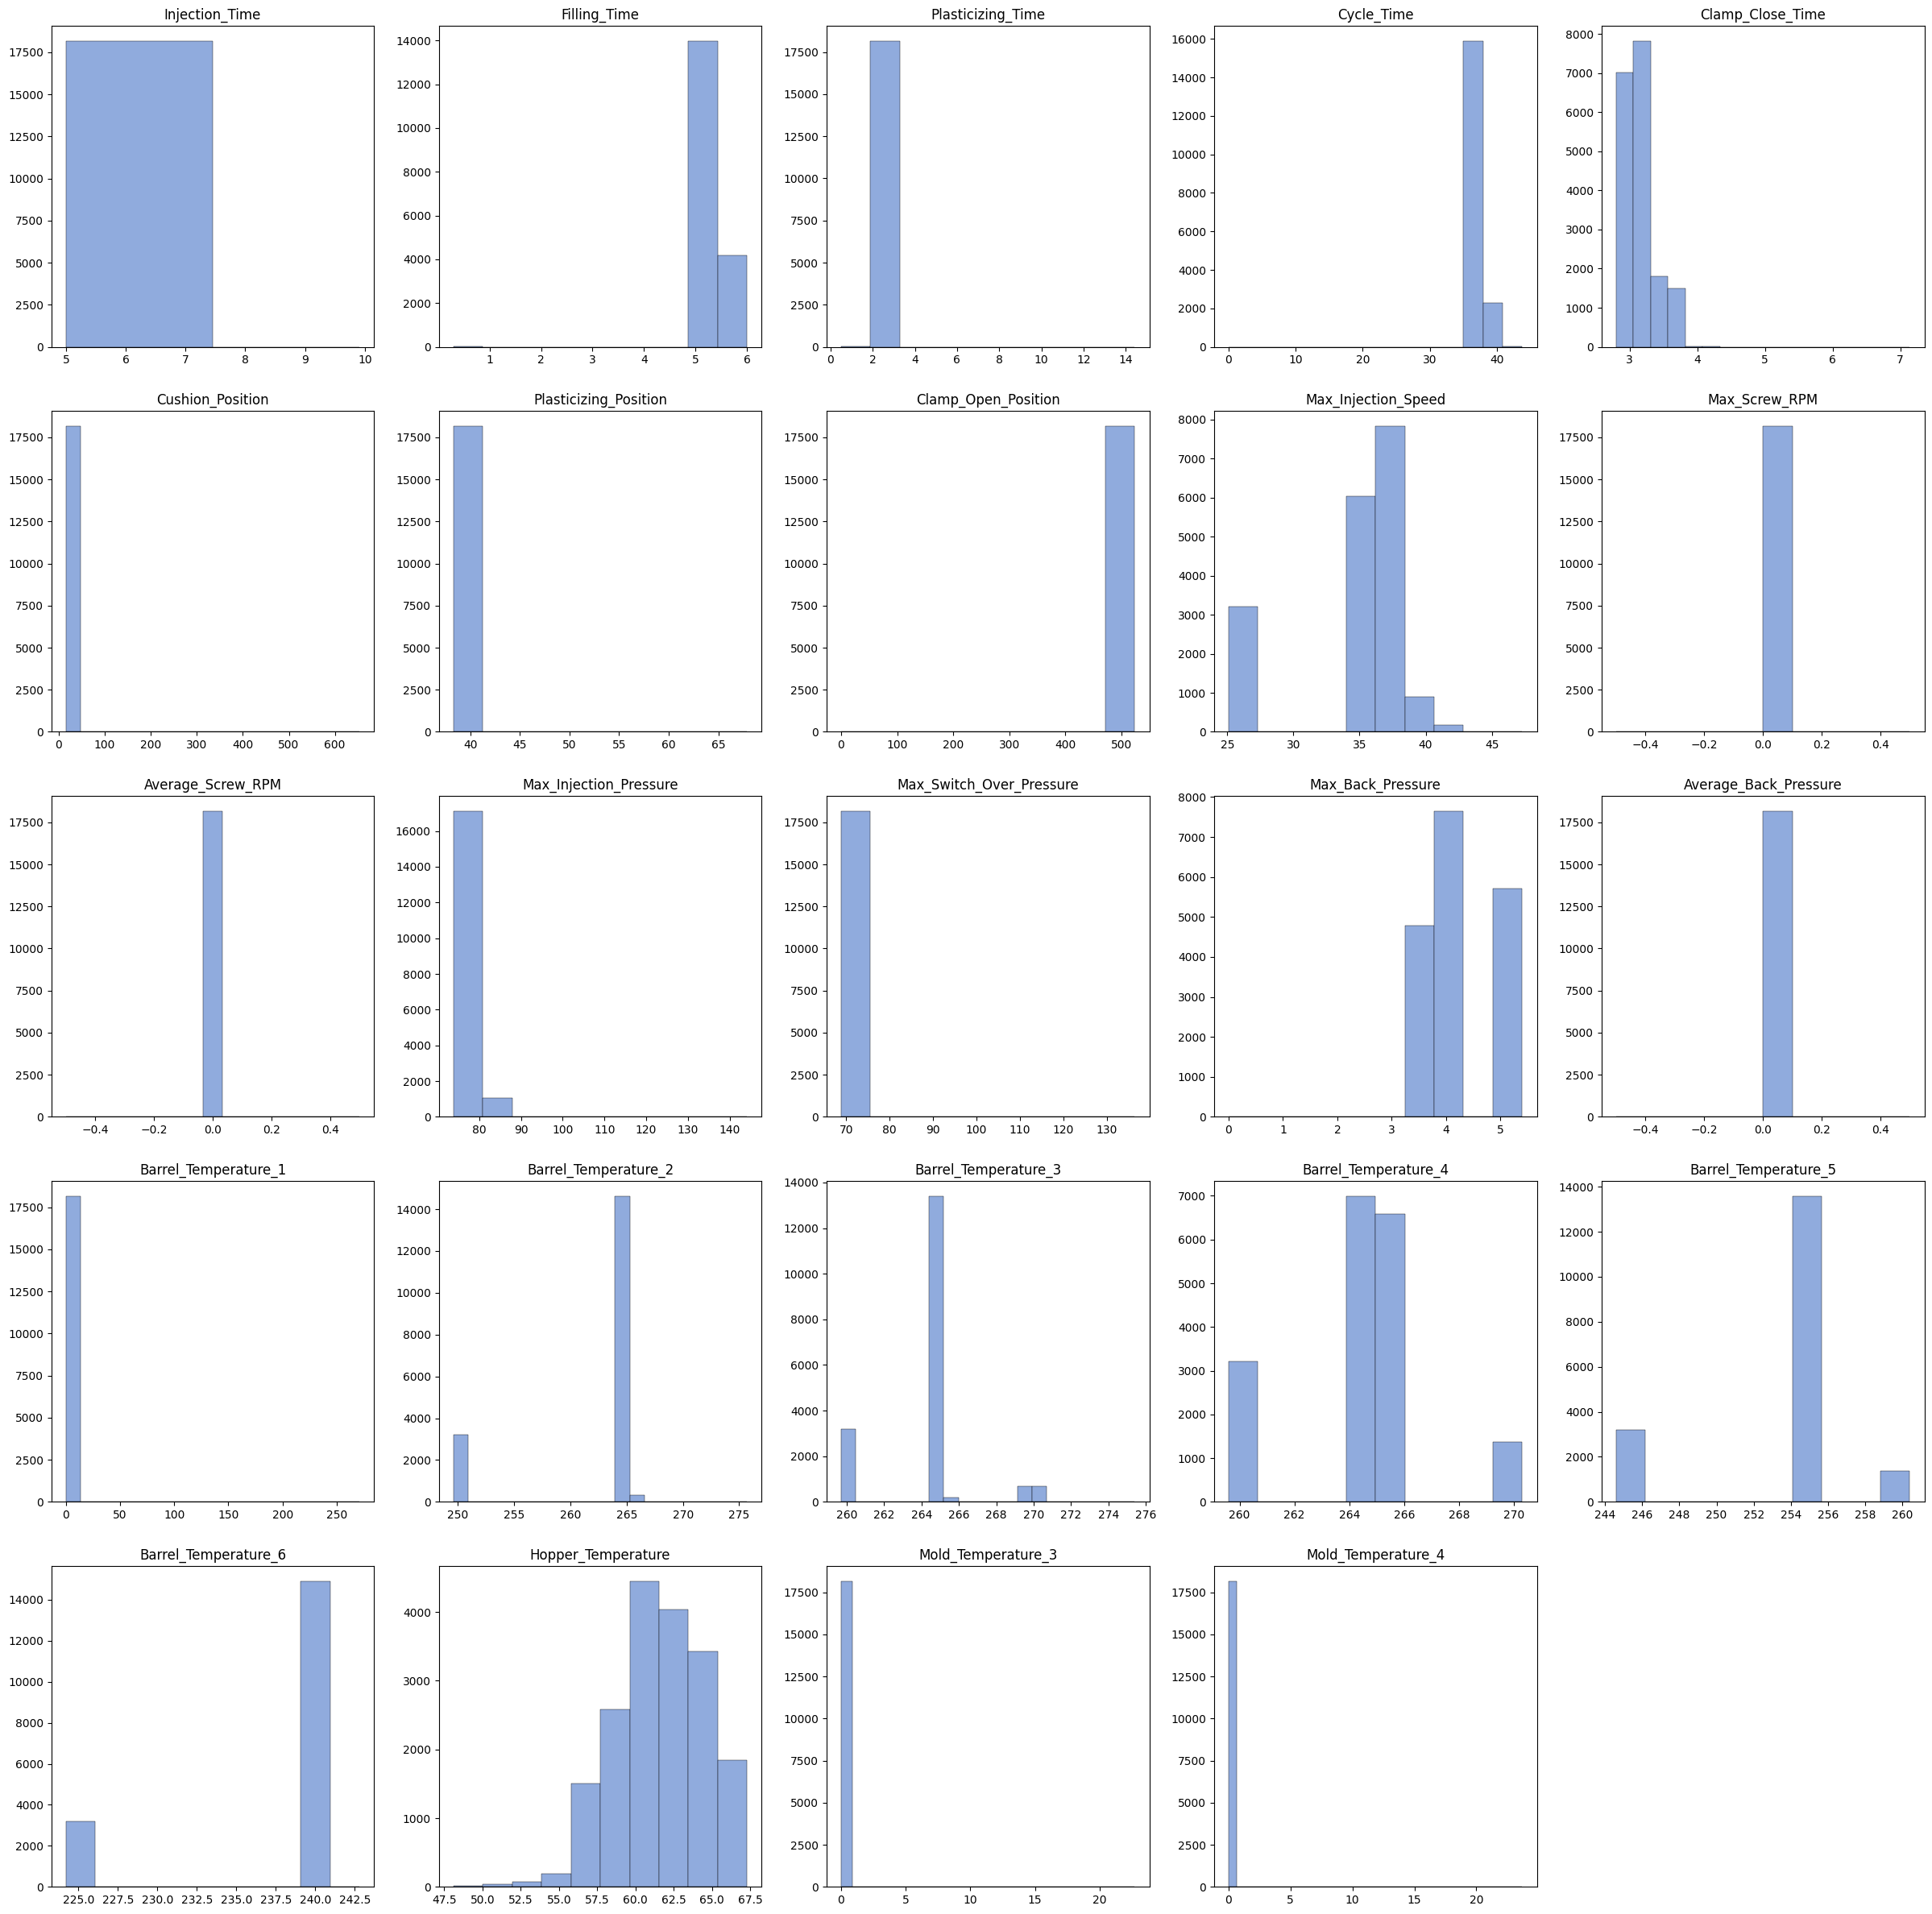

In [22]:
plt.figure(figsize=(30, 30))
bin = [2, 10, 10, 15, 17, 20, 10, 10, 10, 10, 15, 10, 10, 10, 10, 20, 20, 20, 10, 10, 10, 10, 25, 35, 35]
for index, value in enumerate(unlabeled_cn7_d):
    sub = plt.subplot(5, 5, index + 1)
    sub.hist(unlabeled_cn7_d[value], bins=bin[index], facecolor=(144/255,171/255,221/255), linewidth=0.3, edgecolor='black')
    plt.title(value)


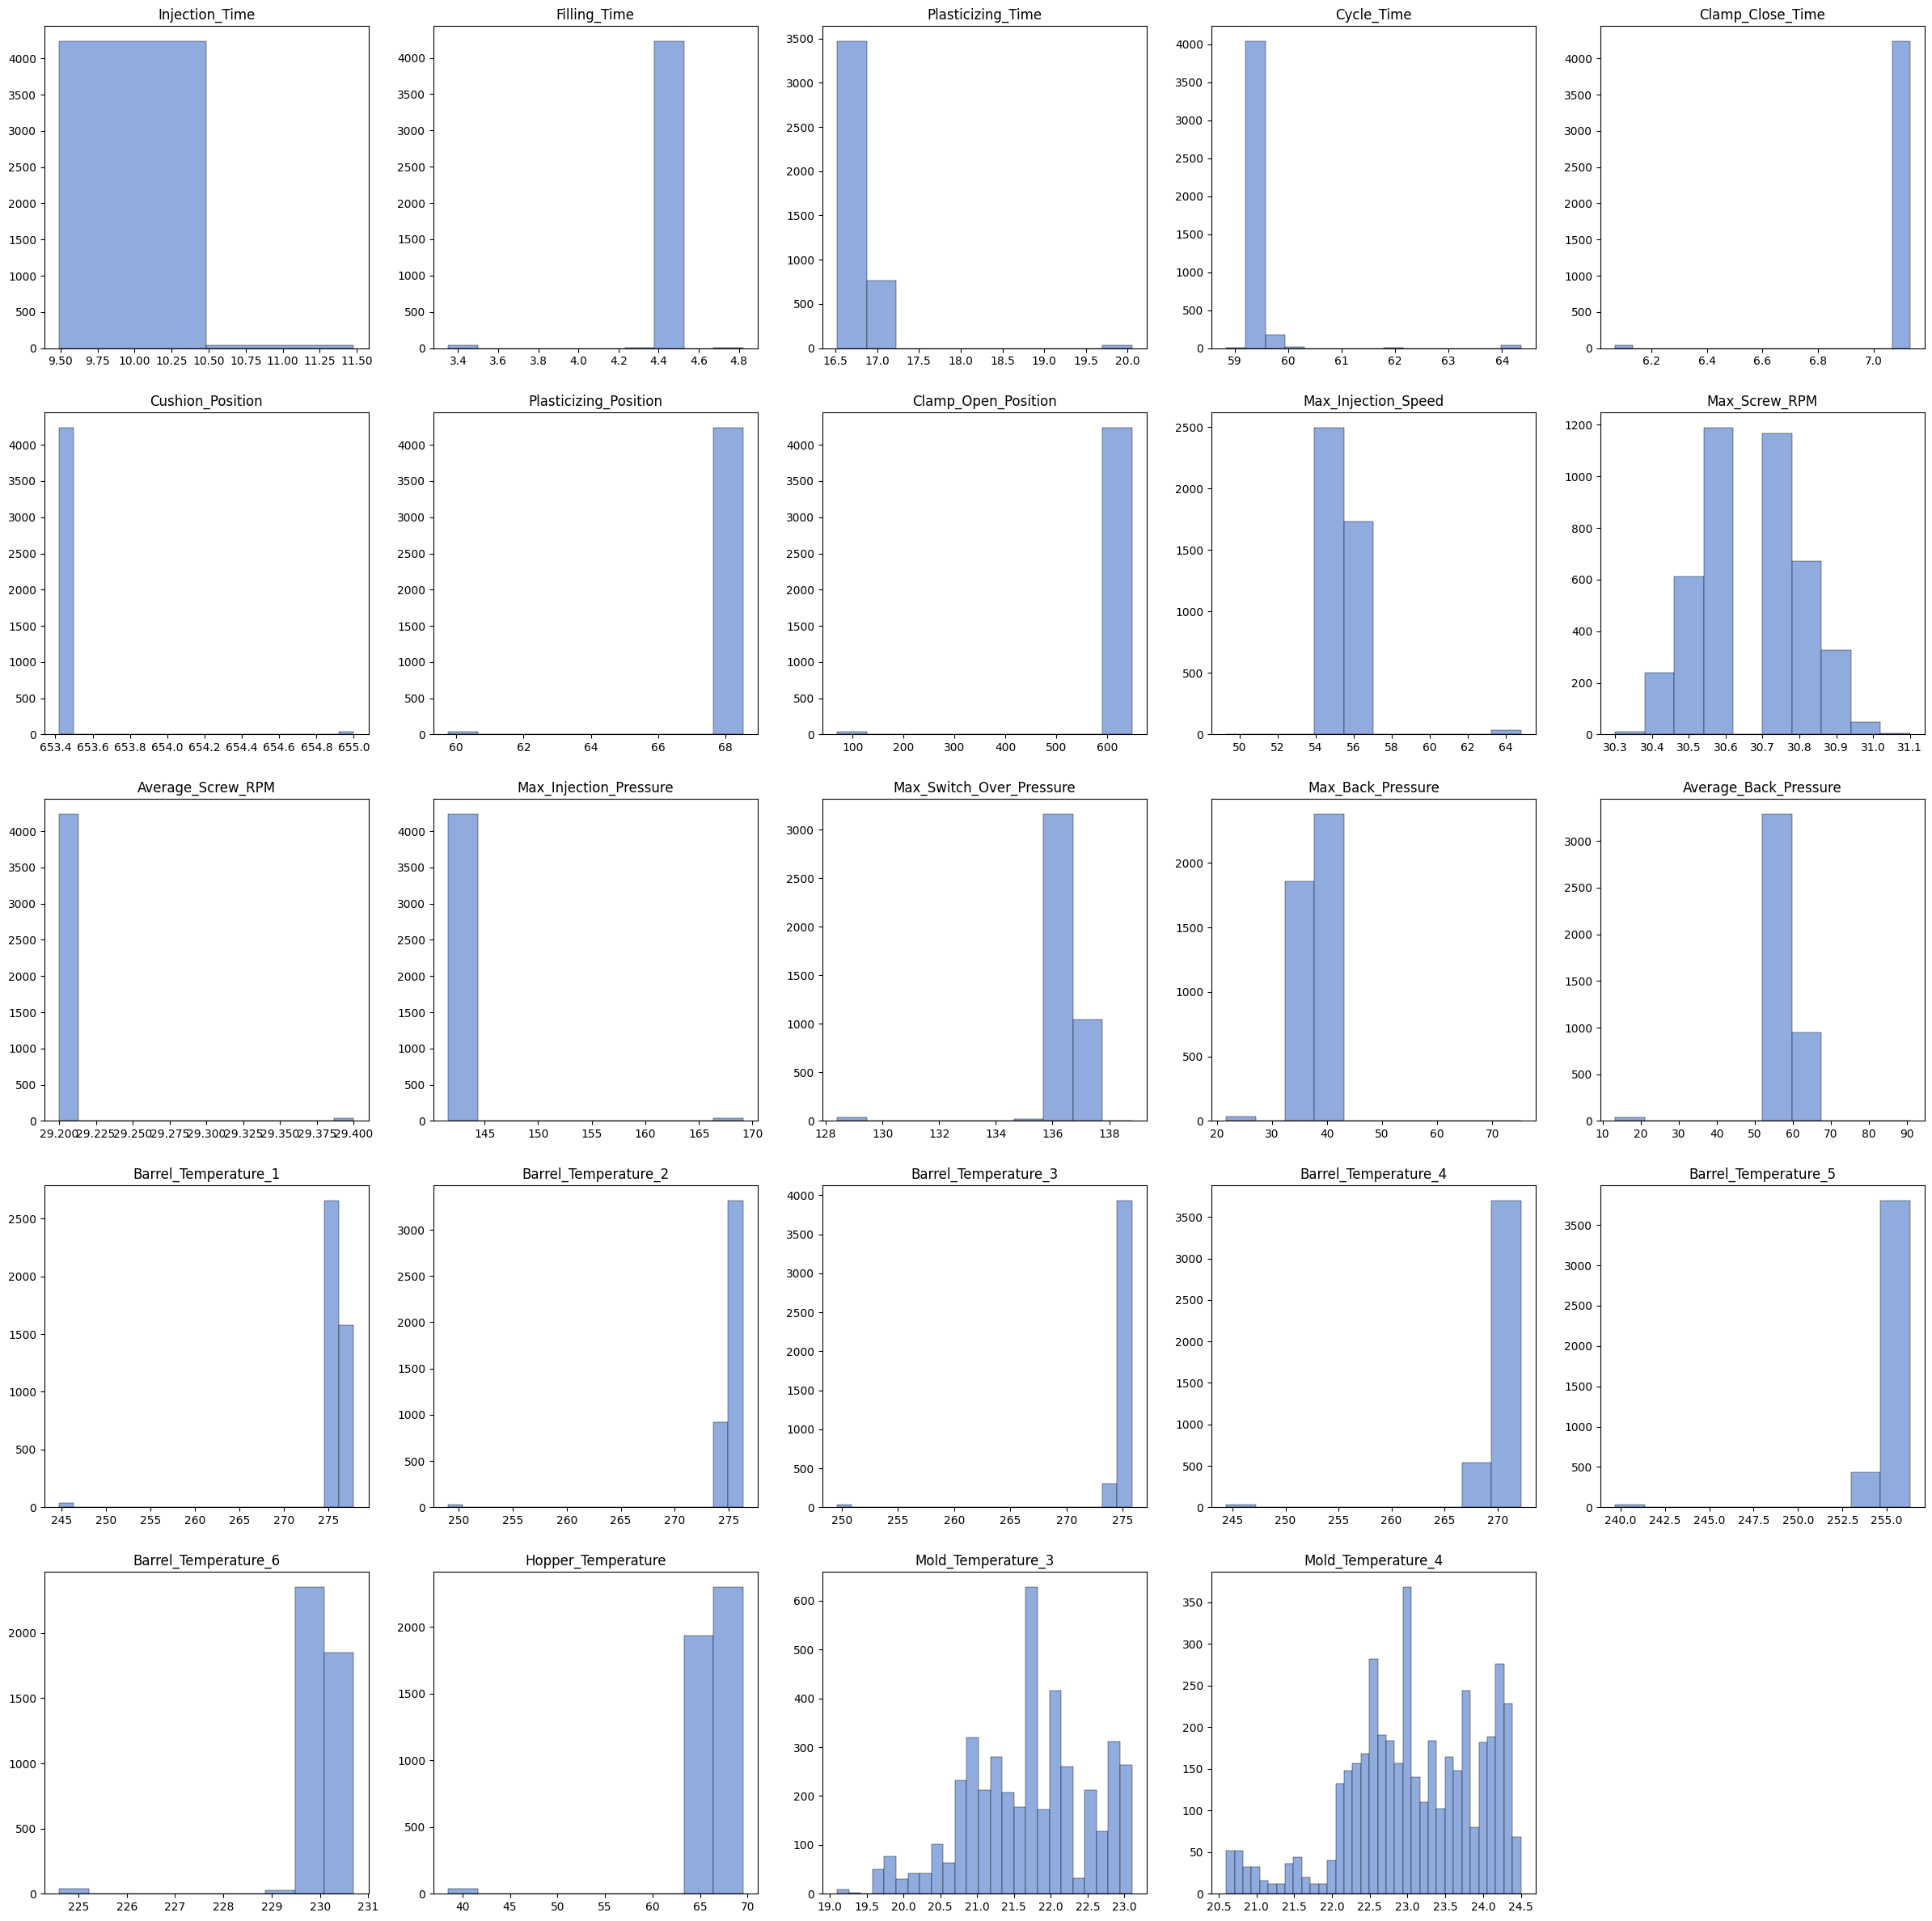

In [23]:
plt.figure(figsize=(30, 30))
bin = [2, 10, 10, 15, 17, 20, 10, 10, 10, 10, 15, 10, 10, 10, 10, 20, 20, 20, 10, 10, 10, 10, 25, 35, 35]
for index, value in enumerate(labeled_cn7_d):
    sub = plt.subplot(5, 5, index + 1)
    sub.hist(labeled_cn7_d[value], bins=bin[index], facecolor=(144/255,171/255,221/255), linewidth=0.3, edgecolor='black')
    plt.title(value)


In [28]:
labeled_cn7_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4270 entries, 3022 to 7995
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Injection_Time            4270 non-null   float64
 1   Filling_Time              4270 non-null   float64
 2   Plasticizing_Time         4270 non-null   float64
 3   Cycle_Time                4270 non-null   float64
 4   Clamp_Close_Time          4270 non-null   float64
 5   Cushion_Position          4270 non-null   float64
 6   Plasticizing_Position     4270 non-null   float64
 7   Clamp_Open_Position       4270 non-null   float64
 8   Max_Injection_Speed       4270 non-null   float64
 9   Max_Screw_RPM             4270 non-null   float64
 10  Average_Screw_RPM         4270 non-null   float64
 11  Max_Injection_Pressure    4270 non-null   float64
 12  Max_Switch_Over_Pressure  4270 non-null   float64
 13  Max_Back_Pressure         4270 non-null   float64
 14  Average_Ba

In [29]:
unlabeled_cn7_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18152 entries, 143072 to 761948
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Injection_Time            18152 non-null  float64
 1   Filling_Time              18152 non-null  float64
 2   Plasticizing_Time         18152 non-null  float64
 3   Cycle_Time                18152 non-null  float64
 4   Clamp_Close_Time          18152 non-null  float64
 5   Cushion_Position          18152 non-null  float64
 6   Plasticizing_Position     18152 non-null  float64
 7   Clamp_Open_Position       18152 non-null  float64
 8   Max_Injection_Speed       18152 non-null  float64
 9   Max_Screw_RPM             18152 non-null  float64
 10  Average_Screw_RPM         18152 non-null  float64
 11  Max_Injection_Pressure    18152 non-null  float64
 12  Max_Switch_Over_Pressure  18152 non-null  float64
 13  Max_Back_Pressure         18152 non-null  float64
 14  Avera

In [43]:

# 이상치를 제거하는 함수 정의
def filter_outliers(filtered_data, col_name):
    
    max_v = labeled_cn7_u[col_name].max()
    min_v = labeled_cn7_u[col_name].min()
    filtered_data = filtered_data[(min_v <= filtered_data[col_name] ) & (filtered_data[col_name] <= max_v)].copy()
    return filtered_data


In [58]:
filtered_data = unlabeled_cn7_u.copy()

In [59]:
filtered_data = filtered_data.drop(columns=["Clamp_Open_Position"])

In [60]:
for col_name in filtered_data.columns:
    filtered_data = filter_outliers(filtered_data, col_name)
    print(col_name)
    print(len(filtered_data))
    print("=========================")

Injection_Time
14829
Filling_Time
14182
Plasticizing_Time
13564
Cycle_Time
12246
Clamp_Close_Time
12246
Cushion_Position
12244
Plasticizing_Position
12098
Max_Injection_Speed
12098
Max_Screw_RPM
12098
Average_Screw_RPM
12098
Max_Injection_Pressure
12098
Max_Switch_Over_Pressure
12098
Max_Back_Pressure
12098
Average_Back_Pressure
12098
Barrel_Temperature_1
12072
Barrel_Temperature_2
12037
Barrel_Temperature_3
11991
Barrel_Temperature_4
11981
Barrel_Temperature_5
11962
Barrel_Temperature_6
11953
Hopper_Temperature
11841
Mold_Temperature_3
8115
Mold_Temperature_4
6137


In [50]:
labeled_cn7_u["Clamp_Open_Position"].value_counts()

Clamp_Open_Position
647.98999    2466
Name: count, dtype: int64

In [51]:
unlabeled_cn7_u["Clamp_Open_Position"].value_counts()

Clamp_Open_Position
647.99    15381
76.63      1199
652.00      399
109.64       57
35.63        21
66.63        17
34.64         7
79.63         6
Name: count, dtype: int64

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
114610,10.19,3.07,16.82,72.24,7.10,653.71,65.48,652.00,74.7,30.7,...,33.9,270.9,275.5,274.5,270.1,264.7,240.0,58.9,22.0,23.1
114688,10.22,3.10,16.83,72.30,7.10,653.69,65.68,652.00,74.2,30.7,...,34.1,271.6,276.1,274.7,270.5,264.7,240.3,59.2,22.8,24.6
114919,10.21,3.10,16.85,72.24,7.10,653.70,65.69,652.00,74.2,30.7,...,33.9,270.8,275.0,274.7,270.1,265.7,239.7,58.6,21.2,22.7
115304,10.22,3.10,16.81,72.24,7.10,653.72,65.69,652.00,74.3,30.7,...,33.9,271.2,275.5,275.2,271.0,264.7,240.2,58.6,19.1,20.0
115582,10.22,3.10,16.86,72.30,7.10,653.69,65.70,652.00,74.2,30.6,...,33.9,271.4,274.9,275.0,270.3,265.1,239.8,58.6,19.8,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777212,9.50,4.39,18.16,59.46,7.12,653.41,68.40,647.99,57.2,30.9,...,59.2,276.3,275.3,275.5,271.2,255.2,230.2,68.8,23.5,24.6
777215,9.43,4.32,19.02,59.44,7.12,653.43,68.35,647.99,58.8,31.0,...,58.6,275.8,275.7,274.7,271.8,255.1,230.0,69.5,23.5,24.5
777216,9.43,4.32,19.02,59.44,7.12,653.43,68.35,647.99,58.8,31.0,...,58.6,275.8,275.7,274.7,271.8,255.1,230.0,69.5,23.5,24.5
777219,9.36,4.24,21.10,59.36,7.12,653.45,68.12,647.99,60.5,31.2,...,57.7,276.2,275.0,275.3,271.7,254.9,230.5,69.5,23.5,24.5
